In [ ]:
#PROJECT 3

# Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are
liability customers (depositors) with varying sizes of deposits. The number of customers who are
also borrowers (asset customers) is quite small, and the bank is interested in expanding this base
rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers
to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate
of over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing
department to identify the potential customers who have a higher probability of purchasing the
loan.


# Objective

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

# Dataset

Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life
Bank)?


# Import the necessary packages

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

<IPython.core.display.Javascript object>

# Read the dataset

In [2]:
data = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
loan = data.copy()

<IPython.core.display.Javascript object>

# View the first and last 5 rows of the dataset.

In [4]:
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [5]:
loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

# Understand the shape of the dataset.

In [6]:
loan.shape

(5000, 14)

<IPython.core.display.Javascript object>

In [7]:
# Check the data types of the columns for the dataset.

<IPython.core.display.Javascript object>

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

# Summary of the dataset.

In [9]:
loan.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<IPython.core.display.Javascript object>

# Observations-

In [10]:
loan["Personal_Loan"].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

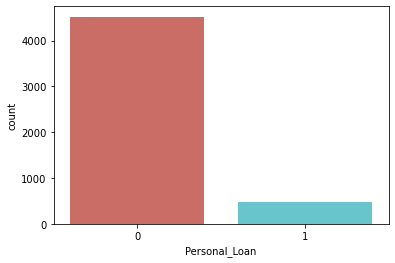

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [11]:
sns.countplot(x="Personal_Loan", data=loan, palette="hls")
plt.show()
plt.savefig("count_plot")

In [12]:
count_no_sub = len(loan[loan['Personal_Loan']==0])
count_sub = len(loan[loan['Personal_Loan']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentage of No Personal_Loan", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Percentage of Personal_Loan", pct_of_sub*100)


Percentage of No Personal_Loan 90.4
Percentage of Personal_Loan 9.6


<IPython.core.display.Javascript object>

Percentage of No Personal Loan to Personal Loan is 90.4% to 9.6%

In [13]:
# checking for unique values in ID column
loan["ID"].nunique()

5000

<IPython.core.display.Javascript object>

Since all the values in ID column are unique we can drop it

In [14]:
loan.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

Also we will drop Zip code because we do not believe they are significant in this analysis

In [15]:
loan.drop(["ZIPCode"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [16]:
loan.shape

(5000, 12)

<IPython.core.display.Javascript object>

# Check for missing values

In [17]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

Good, there are no missing values

In [18]:
numeric_cols = loan.select_dtypes(include=[np.number]).columns


print("Numeric Columns:    ", numeric_cols)

Numeric Columns:     Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')


<IPython.core.display.Javascript object>

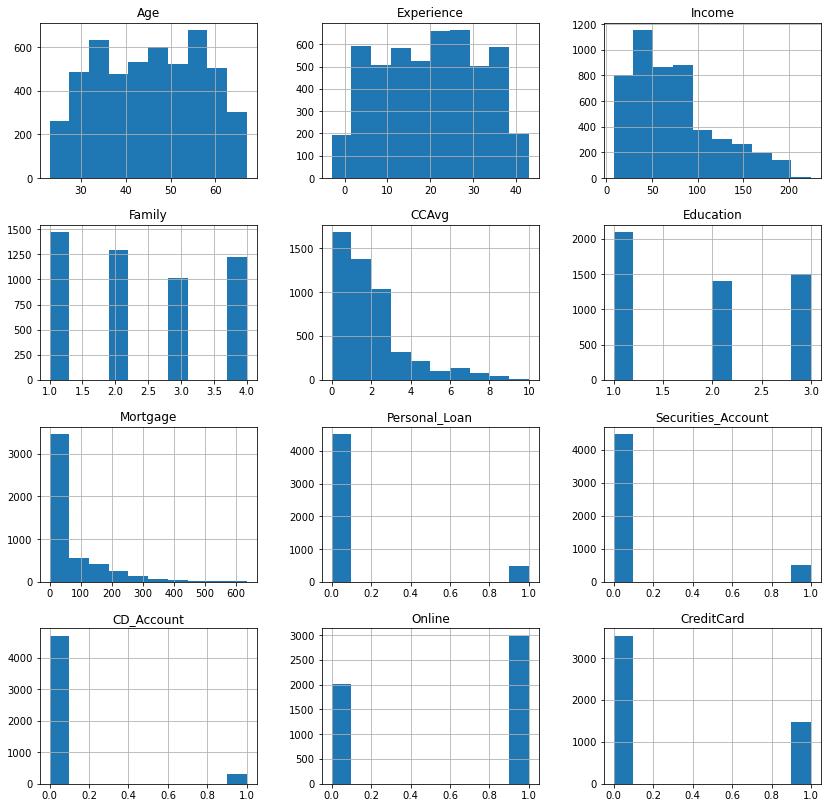

<IPython.core.display.Javascript object>

In [19]:
# creating histograms
loan[numeric_cols].hist(figsize=(14, 14))
plt.show()

In [20]:
loan.Personal_Loan.unique()

array([0, 1], dtype=int64)

<IPython.core.display.Javascript object>

# The below three functions need to be defined to carry out the Exploratory Data Analysis.

# Section 1

In [21]:
# function to create labeled barplots


def labeled_barplot(loan, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    loan: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(loan[feature])  # length of the column
    count = loan[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=loan,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [22]:
def stacked_barplot(loan, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = loan[predictor].nunique()
    sorter = loan[target].value_counts().index[-1]
    tab1 = pd.crosstab(loan[predictor], loan[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(loan[predictor], loan[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [23]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(loan, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = loan[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=loan[loan[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=loan,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

# Univariate analysis

# Section 1

The visuals were not clear in Section 1 so they were redone in Section 2

# Age

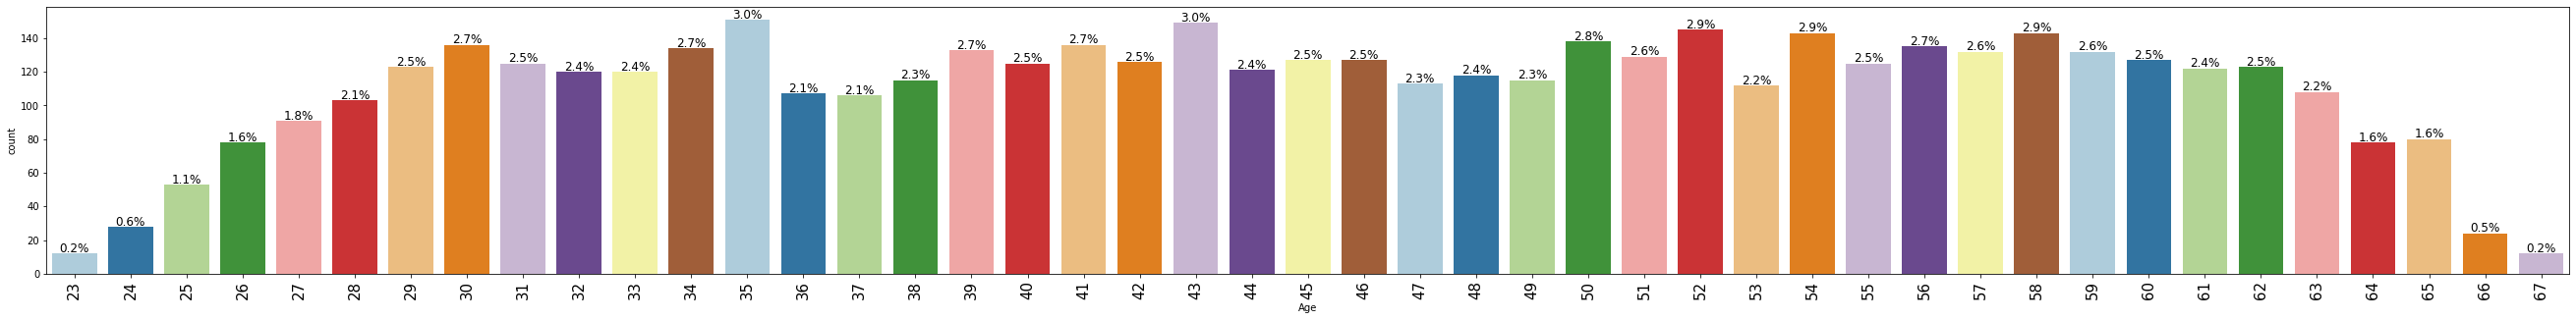

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(loan, "Age", perc=True)

# Observations on Experience

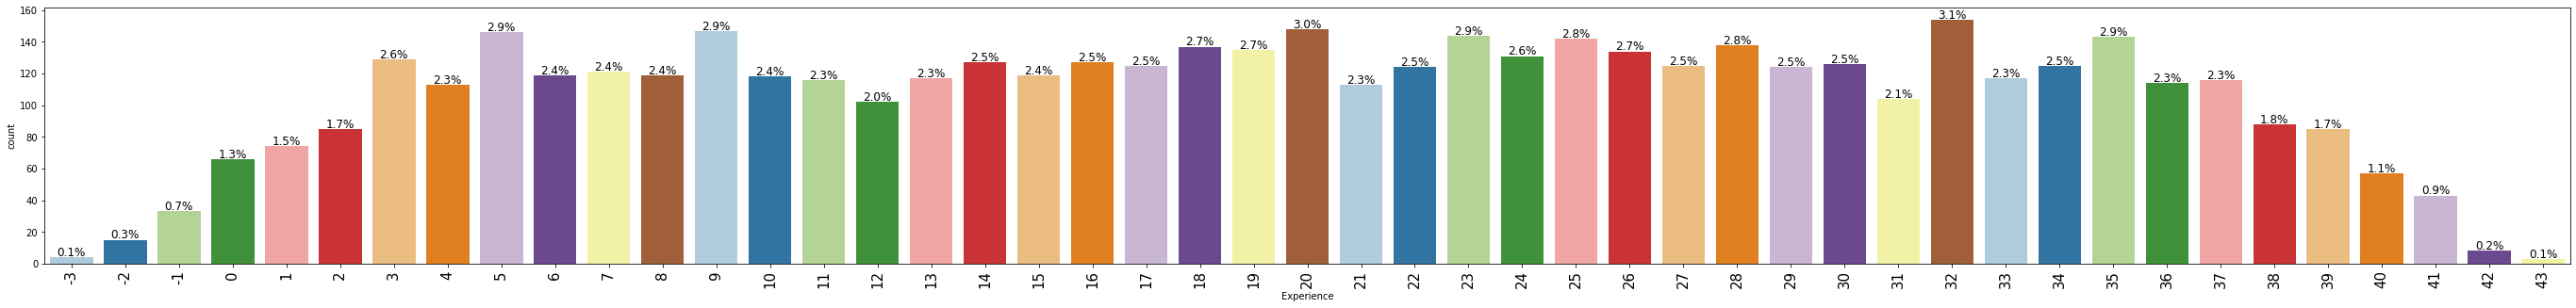

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(loan, "Experience", perc=True)

# Observations on Income

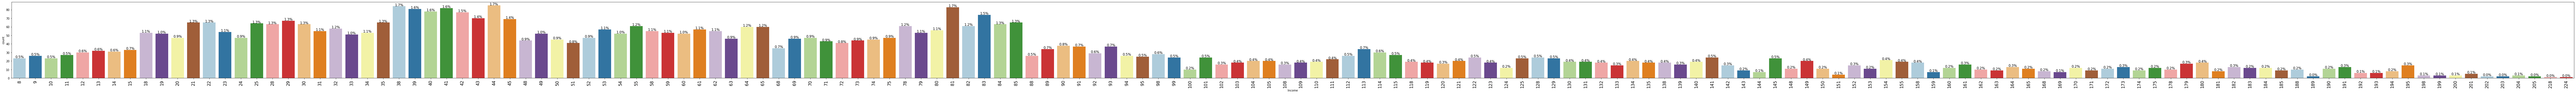

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(loan, "Income", perc=True)

# Observations on Family

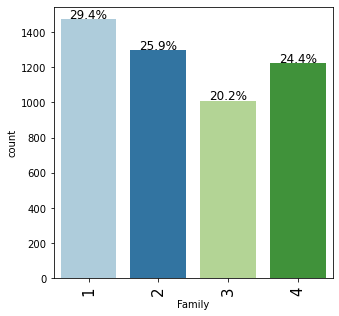

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(loan, "Family", perc=True)

# Observations on CCAvg

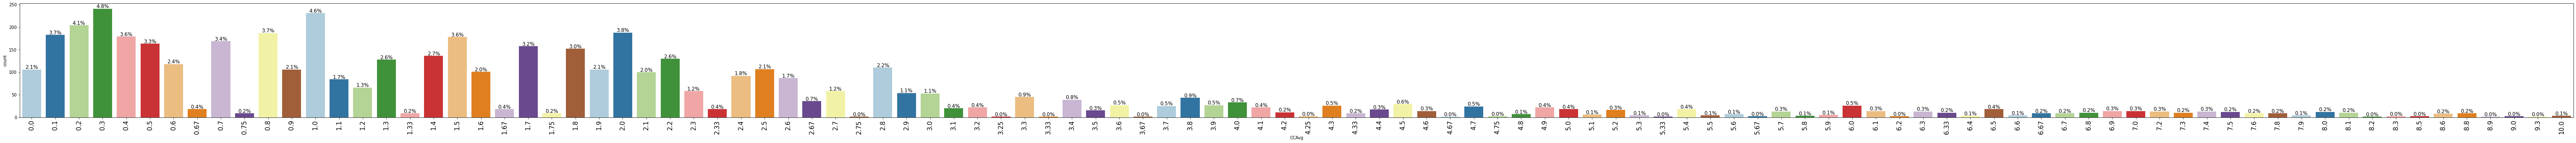

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(loan, "CCAvg", perc=True)

# Observations on Education

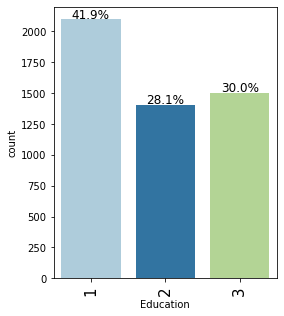

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(loan, "Education", perc=True)

# Observations on Mortgage

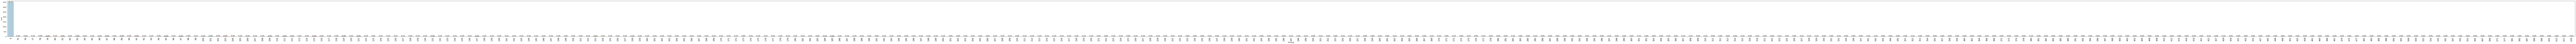

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(loan, "Mortgage", perc=True)

# Observations on Securities Account

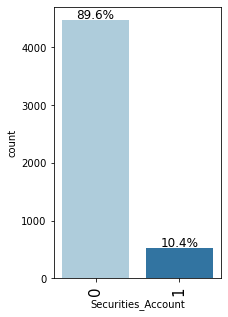

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(loan, "Securities_Account", perc=True)

# Observations on CD Account

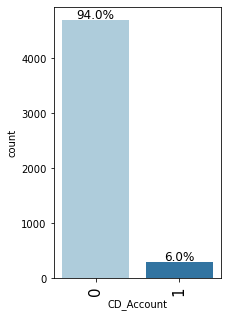

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(loan, "CD_Account", perc=True)

# Observations on Online

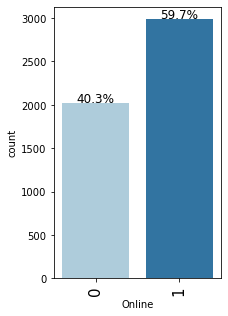

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(loan, "Online", perc=True)

# Observations on CreditCard

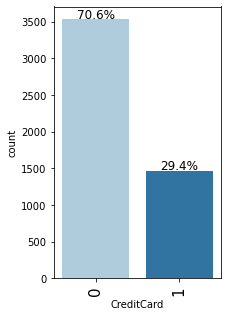

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(loan, "CreditCard", perc=True)

# Section 2

# Function 2.1

In [36]:
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

# Function 2.2
We will use this function for some of the variables.

In [37]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(loan, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(loan[z])  # length of the column
    plt.figure(figsize=(10, 5))
    # plt.xticks(rotation=45)
    ax = sns.countplot(loan[z], palette="viridis")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

# Age

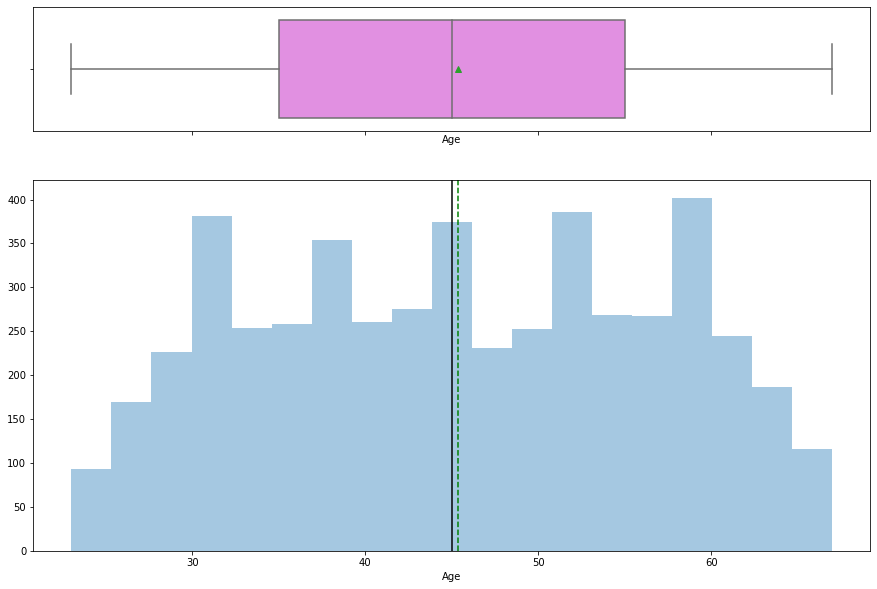

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(loan["Age"])

Age seems to be somewhat normally distributed with no outliers.


# Experience

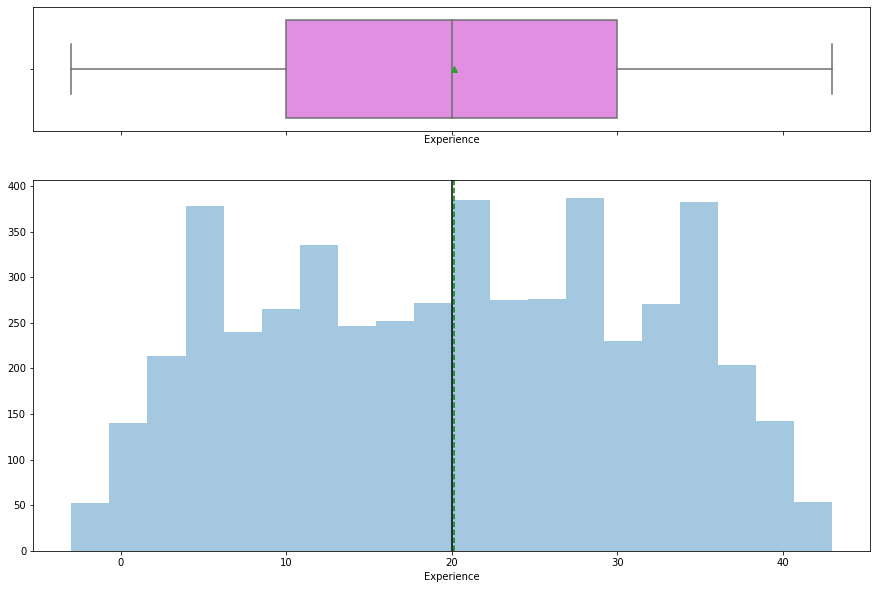

<IPython.core.display.Javascript object>

In [39]:
histogram_boxplot(loan["Experience"])

Seems to be evenly distributed around the mean/median. No outliers

# Income

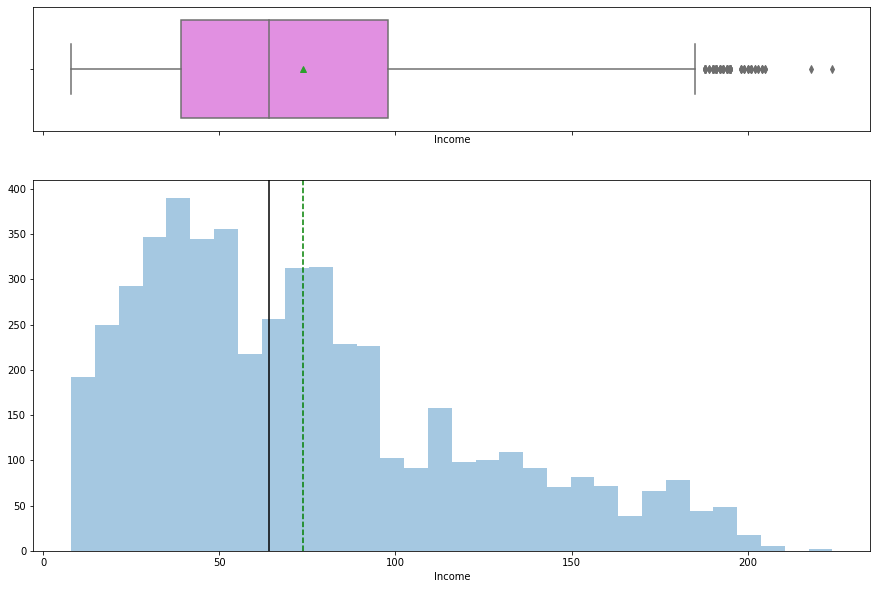

<IPython.core.display.Javascript object>

In [40]:
histogram_boxplot(loan["Income"])

Income is skewed to the right and there are no outliers

# Family

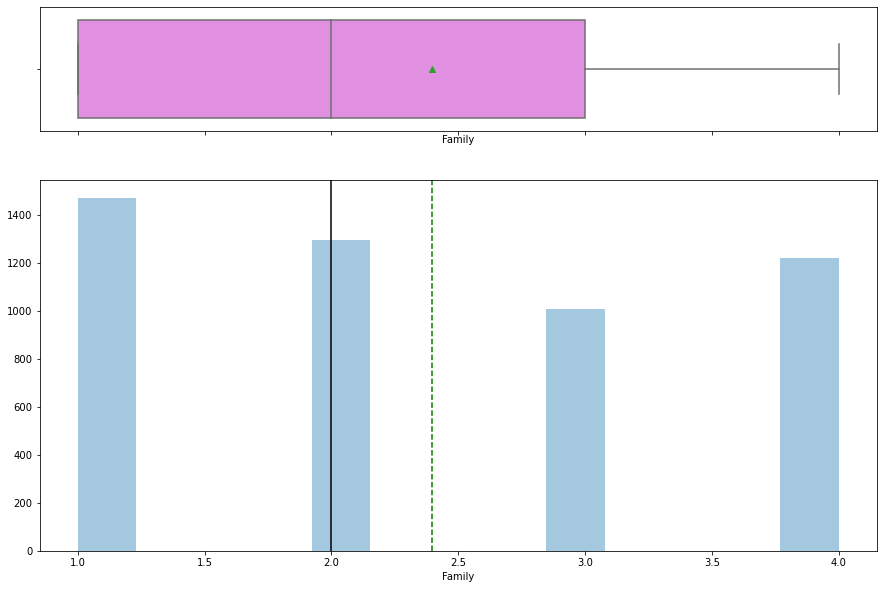

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(loan["Family"])

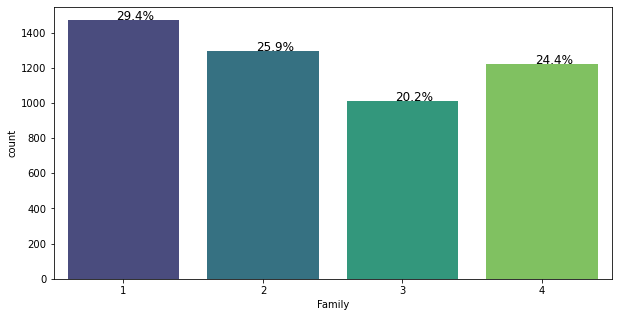

<IPython.core.display.Javascript object>

In [42]:
perc_on_bar(loan, "Family")  # Function 2.2

# Education

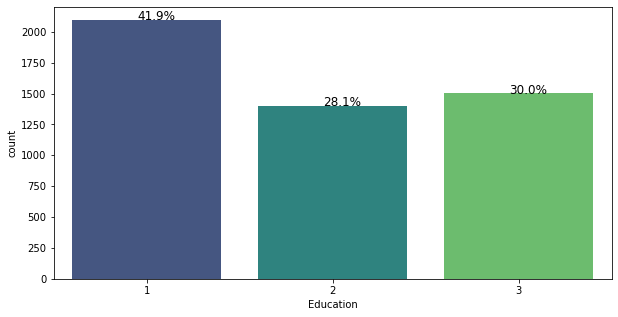

<IPython.core.display.Javascript object>

In [43]:
perc_on_bar(loan, "Education")

# Securities_Account

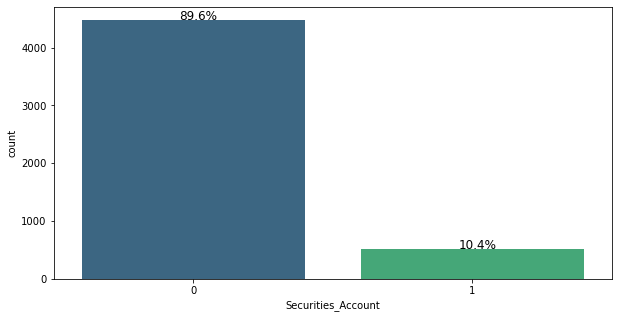

<IPython.core.display.Javascript object>

In [44]:
perc_on_bar(loan, "Securities_Account")

Most of the customers, 89% do not have a Securities Account

# CD_Account

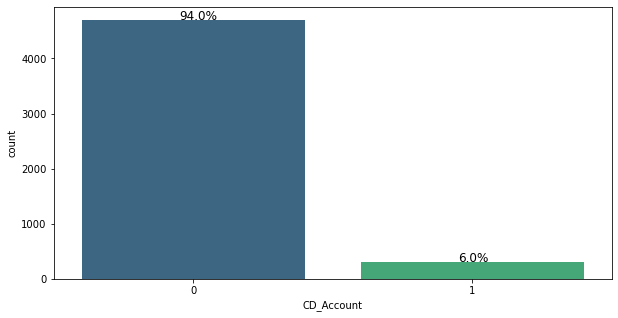

<IPython.core.display.Javascript object>

In [46]:
perc_on_bar(loan, "CD_Account")

94% of customers do not have a a CD Account

# Online

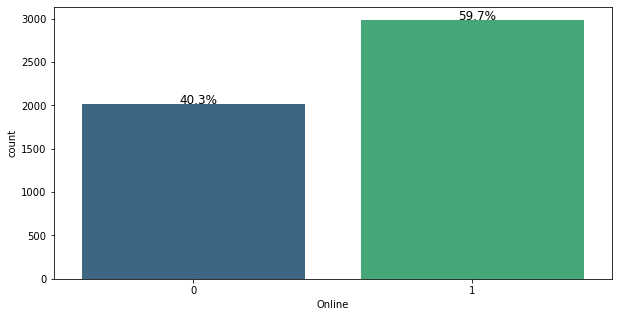

<IPython.core.display.Javascript object>

In [47]:
perc_on_bar(loan, "Online")

About 60% of customers use Online Banking Facilities.

# Credit Card

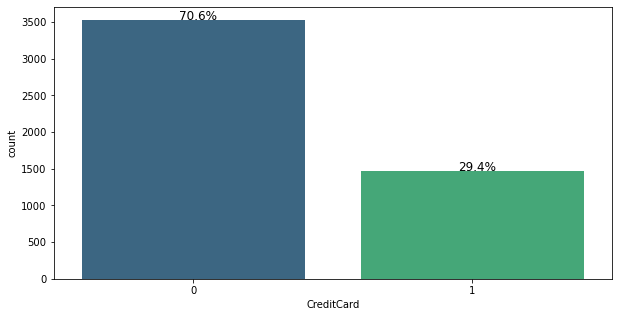

<IPython.core.display.Javascript object>

In [48]:
perc_on_bar(loan, "CreditCard")

About 70% of customers do not have Credit Cards.

# Section 3

# Bivariate Analysis

In [49]:
loan.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD_Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<IPython.core.display.Javascript object>

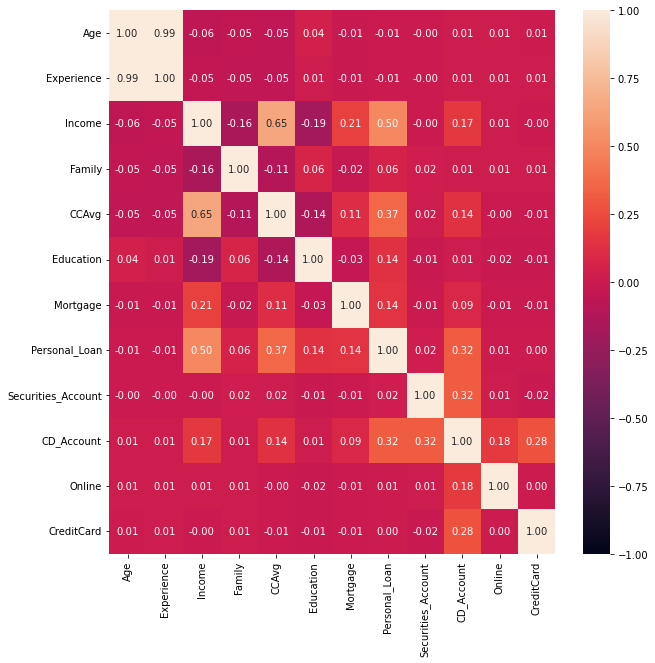

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

Looking at the data:
1. Accepting a Personal Loan has the correlation with income at 50% followed by CCAvg at 37%
2. Experience and Age have a strong positive correlation at 99%
3. You have a moderate correlation between Personal Loan and CD_Account at 32%, Securities Account and CD Account at 32%
and CreditCard and CD Account at 28%
4. Online use of banking facilities had a small relationship at 1% with accepting a Personal Loan. Online use of banking facilities had the strongest correlation with having a CD Account t 18%

# Section 3.1

In [51]:
# function to plot stacked bar chart


def stacked_barplot(loan, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

# Personal Loan and Age

Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
33              105   15   120
52              130   15   145
29              108   15   123
54              128   15   143
43              134   15   149
42              112   14   126
56              121   14   135
65               66   14    80
44              107   14   121
50              125   13   138
45              114   13   127
46              114   13   127
26               65   13    78
32              108   12   120
57              120   12   132
38              103   12   115
27               79   12    91
48              106   12   118
61              110   12   122
53              101   11   112
51              119   10   129
60              117   10   127
58              133   10   143
49              105   10   115
47      

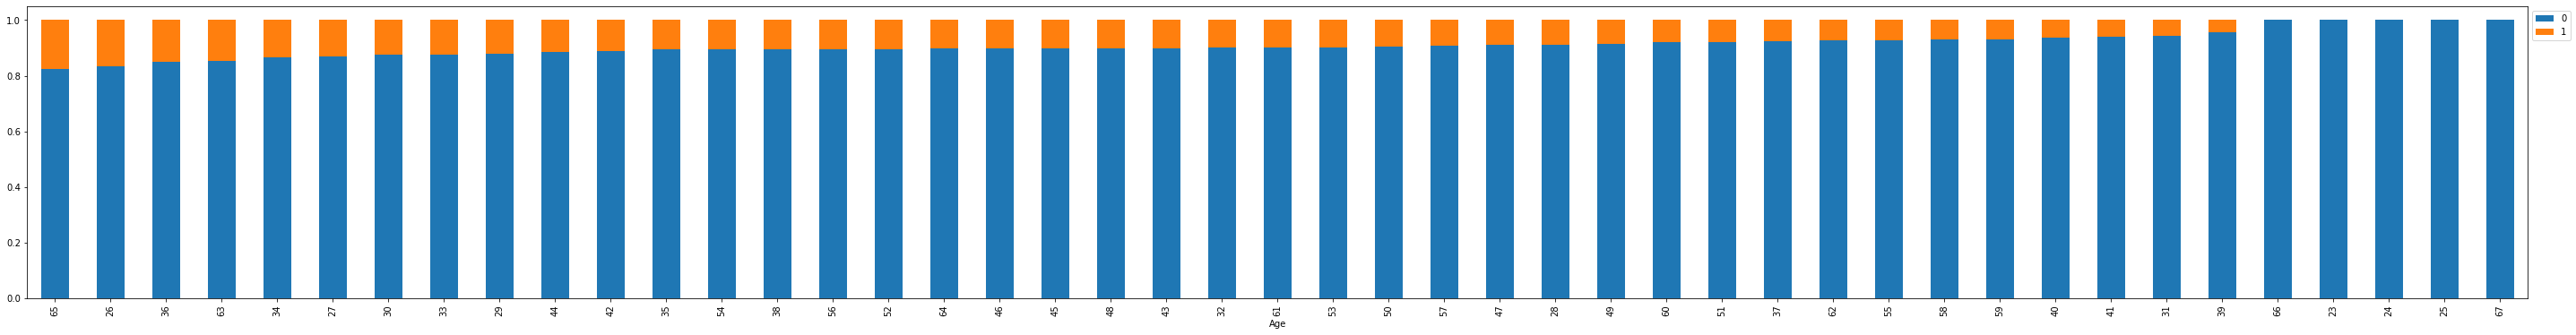

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(loan, "Age", "Personal_Loan")

Visual not clear, see alternative visual below

# Personal Loan and Experience

Personal_Loan     0    1   All
Experience                    
All            4520  480  5000
9               127   20   147
8               101   18   119
20              131   17   148
3               112   17   129
12               86   16   102
32              140   14   154
19              121   14   135
5               132   14   146
25              128   14   142
26              120   14   134
37              103   13   116
11              103   13   116
16              114   13   127
30              113   13   126
22              111   13   124
35              130   13   143
23              131   13   144
36              102   12   114
29              112   12   124
7               109   12   121
6               107   12   119
18              125   12   137
31               92   12   104
28              127   11   138
21              102   11   113
13              106   11   117
17              114   11   125
34              115   10   125
39               75   10    85
27      

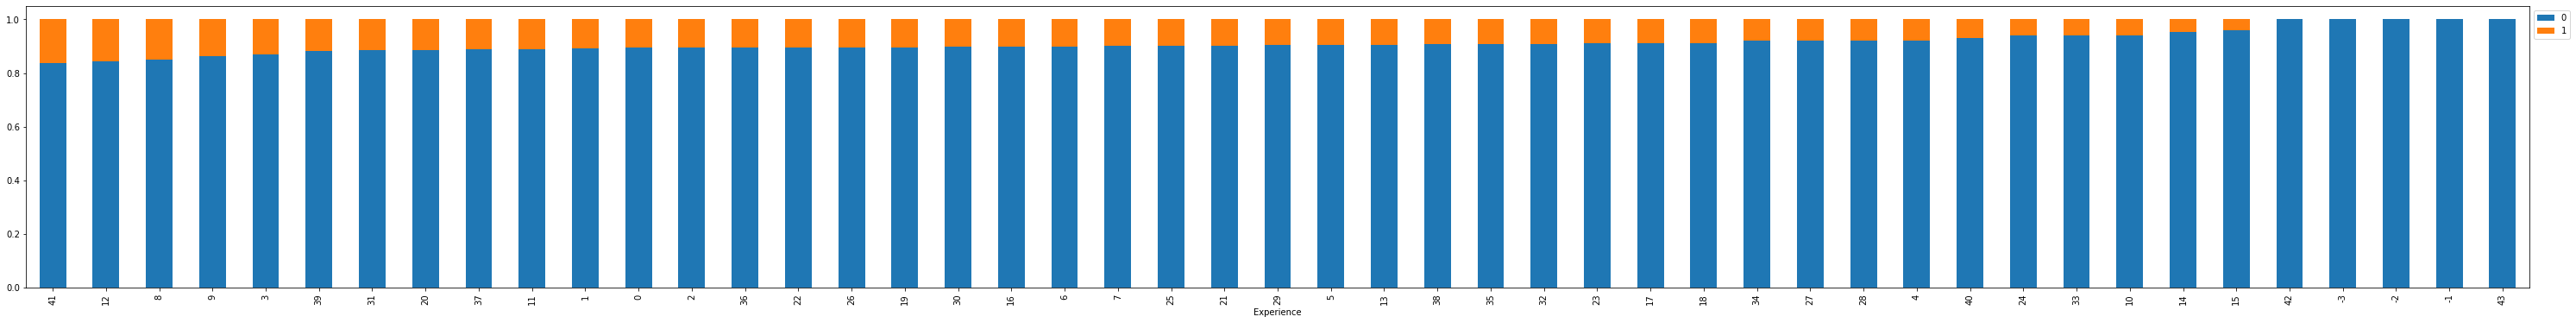

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(loan, "Experience", "Personal_Loan")

Visual not clear, see alternative visual below

# Personal Loan and Income

Personal_Loan     0    1   All
Income                        
All            4520  480  5000
130               8   11    19
182               2   11    13
158               8   10    18
135               8   10    18
179               8    9    17
141              15    9    24
154              12    9    21
123               9    9    18
184               3    9    12
142               7    8    15
131              11    8    19
129              15    8    23
172               3    8    11
173               5    8    13
170               4    8    12
180              10    8    18
115              19    8    27
125              16    7    23
164               6    7    13
188               3    7    10
83               67    7    74
114              23    7    30
161               9    7    16
122              17    7    24
133               8    7    15
132              11    7    18
191               6    7    13
134              13    7    20
111              15    7    22
190     

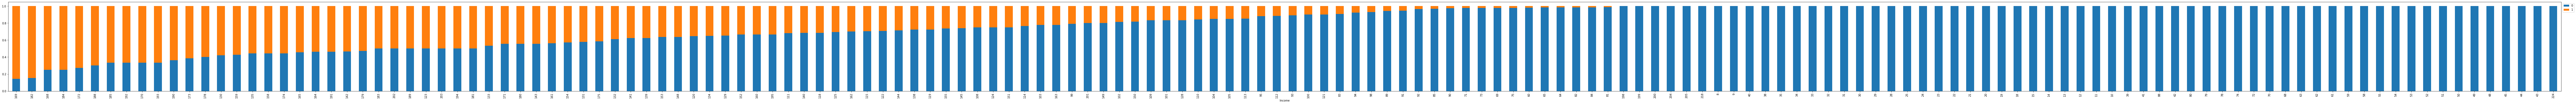

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(loan, "Income", "Personal_Loan")

Visual not clear, see alternative visual below

# Personal_Loan and Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


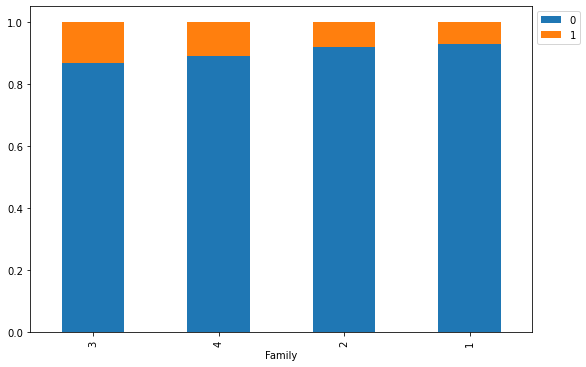

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(loan, "Family", "Personal_Loan")

Family size may not be a good predictor of a customer having or wanting a Personal Loan

# Personal_Loan and CCAvg

Personal_Loan     0    1   All
CCAvg                         
All            4520  480  5000
3.0              34   19    53
4.1               9   13    22
3.4              26   13    39
3.1               8   12    20
4.2               0   11    11
5.4               8   10    18
6.5               8   10    18
3.8              33   10    43
3.6              17   10    27
3.3              35   10    45
5.0               9    9    18
3.9              18    9    27
2.9              45    9    54
2.6              79    8    87
6.0              18    8    26
4.4               9    8    17
4.3              18    8    26
0.2             196    8   204
0.5             155    8   163
4.7              17    7    24
5.2               9    7    16
1.3             121    7   128
2.7              51    7    58
3.7              18    7    25
1.1              77    7    84
5.6               0    7     7
4.0              26    7    33
2.2             123    7   130
4.8               0    7     7
5.1     

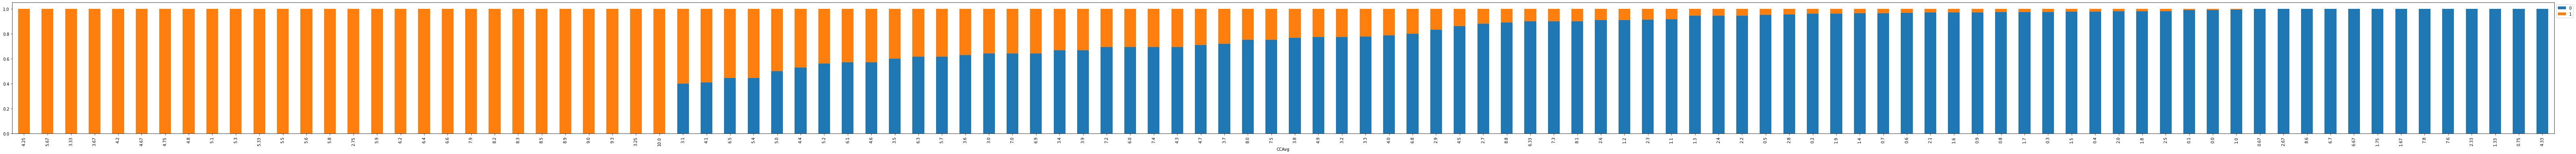

<IPython.core.display.Javascript object>

In [56]:
stacked_barplot(loan, "CCAvg", "Personal_Loan")

We cannot make interpretations from this visual so see alternate below

# Personal_Loan and Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


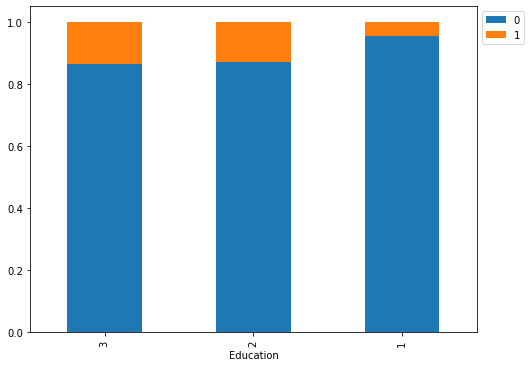

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(loan, "Education", "Personal_Loan")

Undergraduates seem to have less personal loans compared to Graduates and Advanced/Professionals

# Personal Loan and Mortgage

Personal_Loan     0    1   All
Mortgage                      
All            4520  480  5000
0              3150  312  3462
301               0    5     5
342               1    3     4
282               0    3     3
...             ...  ...   ...
276               2    0     2
156               5    0     5
278               1    0     1
280               2    0     2
248               3    0     3

[348 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


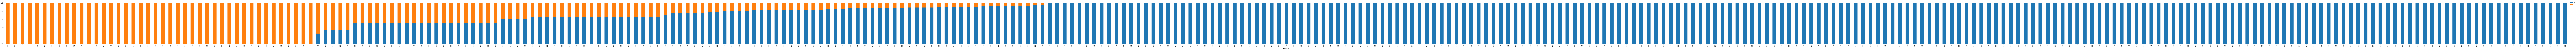

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(loan, "Mortgage", "Personal_Loan")

# Personal_Loan and Securities Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


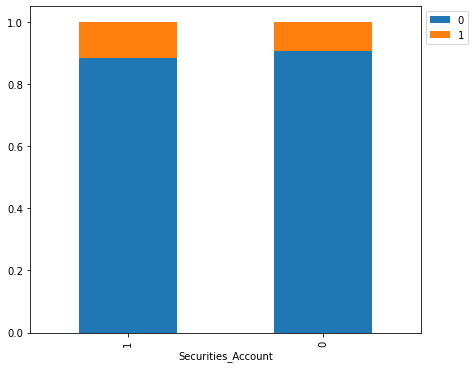

<IPython.core.display.Javascript object>

In [60]:
stacked_barplot(loan, "Securities_Account", "Personal_Loan")

Most people without a securities account do not have a Personal Loan

# Personal_Loan and CD Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


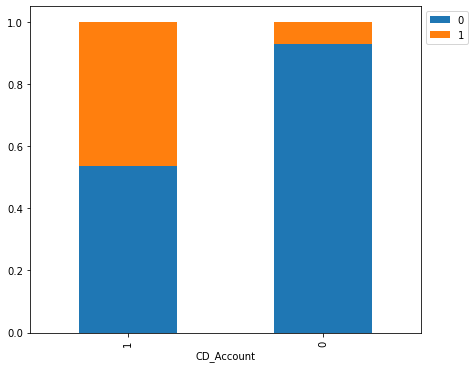

<IPython.core.display.Javascript object>

In [61]:
stacked_barplot(loan, "CD_Account", "Personal_Loan")

Most of the customers with a CD Account have a Personal Loan and likweise those who do not have a CD account do not have a personal loan. Not surprisingly since a CD account makes the bank comfortable in lending you money.

# Personal_Loan and Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


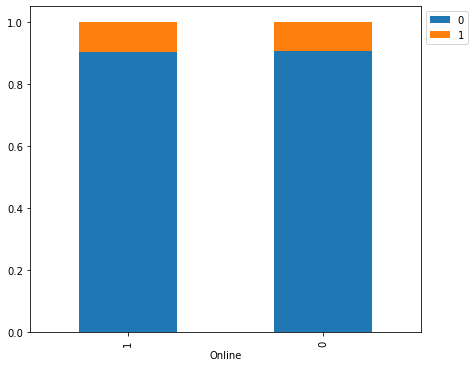

<IPython.core.display.Javascript object>

In [62]:
stacked_barplot(loan, "Online", "Personal_Loan")

Online use is not a clear indicator of having a Personal Loan. See additional Visual below.

# Personal_Loan and CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


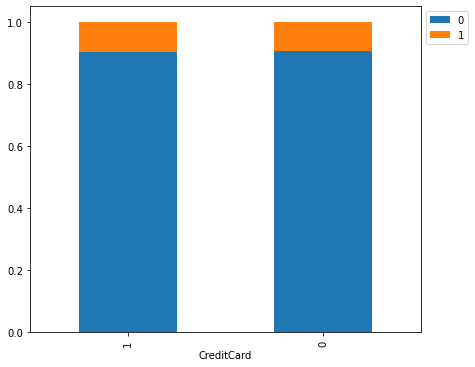

<IPython.core.display.Javascript object>

In [63]:
stacked_barplot(loan, "CreditCard", "Personal_Loan")

# Section 3.2

Visualization for some of the continous variables above were not clear so we created countplots for more clarity.

# Personal Loan and Education

<AxesSubplot:xlabel='Education', ylabel='count'>

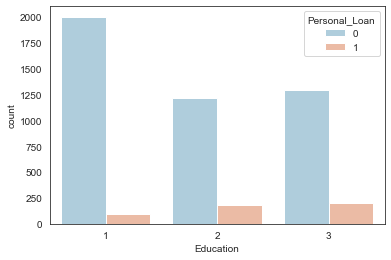

<IPython.core.display.Javascript object>

In [64]:
sns.set_style("white")
sns.countplot(data=loan, x="Education", hue="Personal_Loan", palette="RdBu_r")

As level of customer education increases, Personal Loans increase.

# Mortgage, Personal Loan and Education

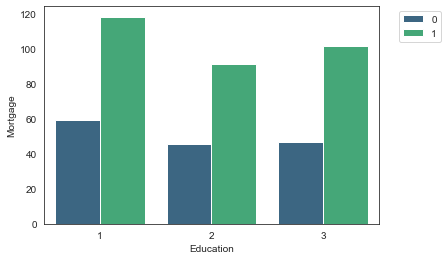

<IPython.core.display.Javascript object>

In [65]:
sns.barplot(
    "Education", "Mortgage", hue="Personal_Loan", data=loan, palette="viridis", ci=None
)
plt.legend(bbox_to_anchor=(1.2, 1))

The relationship between mortgage, education and Persoanl loan is more complex

# Personal Loan and Securities Account

<AxesSubplot:xlabel='Securities_Account', ylabel='count'>

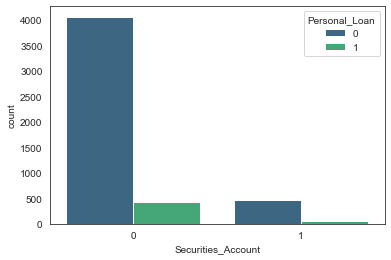

<IPython.core.display.Javascript object>

In [66]:
sns.set_style("white")
sns.countplot(data=loan, x="Securities_Account", hue="Personal_Loan", palette="viridis")

As customers acquire or open securities accounts they reduce Personal Loans.

# Personal Loan and Credit Card

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

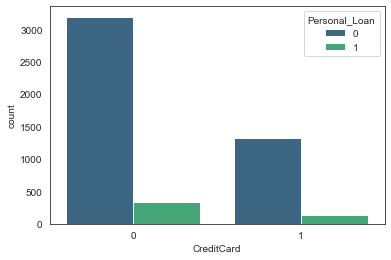

<IPython.core.display.Javascript object>

In [67]:
sns.set_style("white")
sns.countplot(data=loan, x="CreditCard", hue="Personal_Loan", palette="viridis")

Customers have a Credit Card have Personal Loans, and as the number of customers with Credit Cards increase, the number with Personal Loans reduce.They could be disqualified from Personal Loans as they open Credit Cards or they could be just midful of debt.

# Personal Loan and Online

<AxesSubplot:xlabel='Online', ylabel='count'>

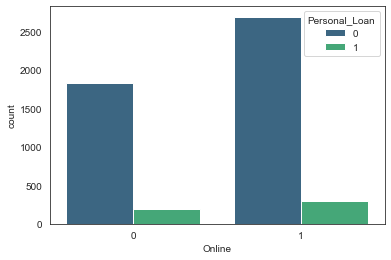

<IPython.core.display.Javascript object>

In [68]:
sns.set_style("white")
sns.countplot(data=loan, x="Online", hue="Personal_Loan", palette="viridis")

Online use is not a clear indicator of having a Personal Loan. More analysis will be required

# Section 3.3

Visualization for some of the continous variables above were not clear so we created boxplots for more clarity.

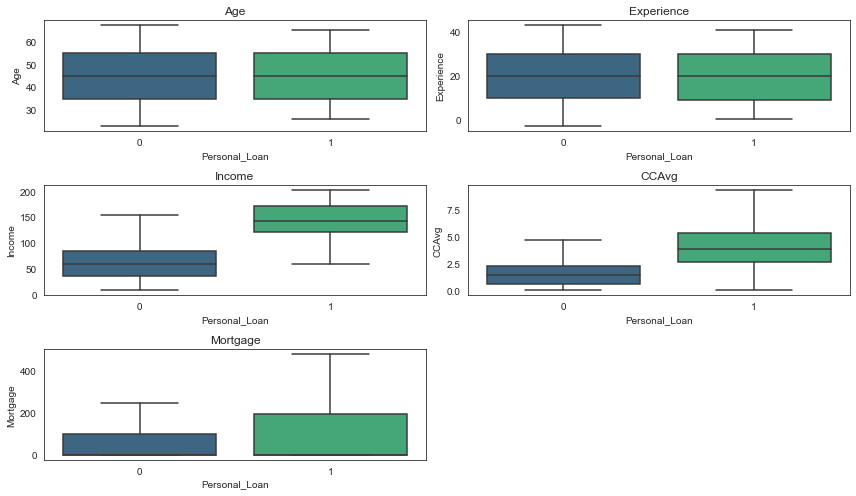

<IPython.core.display.Javascript object>

In [69]:
cols = loan[["Age", "Experience", "Income", "CCAvg", "Mortgage"]].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(
        loan["Personal_Loan"], loan[variable], palette="viridis", showfliers=False
    )
    plt.tight_layout()
    plt.title(variable)
plt.show()

# Section 4

# Data Pre-Processing / Feature Transformation

To deal with the negative values (3) in the experience column, they will be converted to positive integers

In [70]:
loan.Experience = loan["Experience"].replace(-1, 1)
loan.Experience = loan["Experience"].replace(-2, 2)
loan.Experience = loan["Experience"].replace(-3, 3)

loan[loan["Experience"] == -1 | -2 | -3]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


<IPython.core.display.Javascript object>

In [71]:
loan.Experience.value_counts(ascending=False)

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
17    125
34    125
27    125
29    124
22    124
7     121
8     119
6     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

In [72]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


<IPython.core.display.Javascript object>

# Section 5

# Model Building - Approach

1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.

In [73]:
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    precision_recall_curve,
)

<IPython.core.display.Javascript object>

In [74]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


X = loan.drop(["Personal_Loan"], axis=1)
Y = loan[["Personal_Loan"]]
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [76]:
def get_metrics_score(
    model, library, train, test, train_y, test_y, threshold=0.5, flag=True, roc=False
):
    """
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library
    model: classifier to predict values of X
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    """
    # defining an empty list to store train and test results
    if library == "stats":
        score_list = []

        pred_train = model.predict(train) > threshold
        pred_test = model.predict(test) > threshold

        pred_train = np.round(pred_train)
        pred_test = np.round(pred_test)

        train_acc = accuracy_score(pred_train, train_y)
        test_acc = accuracy_score(pred_test, test_y)

        train_recall = recall_score(train_y, pred_train)
        test_recall = recall_score(test_y, pred_test)

        train_precision = precision_score(train_y, pred_train)
        test_precision = precision_score(test_y, pred_test)

        train_f1 = f1_score(train_y, pred_train)
        test_f1 = f1_score(test_y, pred_test)

        score_list.extend(
            (
                train_acc,
                test_acc,
                train_recall,
                test_recall,
                train_precision,
                test_precision,
                train_f1,
                test_f1,
            )
        )

    elif library == "sklearn":
        score_list = []

        pred_train = model.predict(train)
        pred_test = model.predict(test)

        train_acc = accuracy_score(pred_train, train_y)
        test_acc = accuracy_score(pred_test, test_y)

        train_recall = recall_score(train_y, pred_train)
        test_recall = recall_score(test_y, pred_test)

        train_precision = precision_score(train_y, pred_train)
        test_precision = precision_score(test_y, pred_test)

        train_f1 = f1_score(train_y, pred_train)
        test_f1 = f1_score(test_y, pred_test)

        score_list.extend(
            (
                train_acc,
                test_acc,
                train_recall,
                test_recall,
                train_precision,
                test_precision,
                train_f1,
                test_f1,
            )
        )

    if flag == True:
        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        print("ROC-AUC Score on training set : ", roc_auc_score(train_y, pred_train))
        print("ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [77]:
def make_confusion_matrix(
    model, library, test_X, y_actual, threshold=0.5, labels=[1, 0]
):
    """
    model : classifier to predict values of X
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library
    test_X: test set
    y_actual : ground truth
    threshold: thresold for classifiying the observation as 1

    """

    if library == "sklearn":
        y_predict = model.predict(test_X)
        cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
        df_cm = pd.DataFrame(
            cm,
            index=[i for i in ["Actual - yes", "Actual - no"]],
            columns=[i for i in ["Predicted - yes", "Predicted - no"]],
        )
        group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
        group_percentages = [
            "{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)
        ]
        labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
        labels = np.asarray(labels).reshape(2, 2)
        plt.figure(figsize=(10, 7))
        sns.heatmap(df_cm, annot=labels, fmt="")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

    elif library == "stats":
        y_predict = model.predict(test_X) > threshold
        cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
        df_cm = pd.DataFrame(
            cm,
            index=[i for i in ["Actual - yes", "Actual - no"]],
            columns=[i for i in ["Predicted - yes", "Predicted - no"]],
        )
        group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
        group_percentages = [
            "{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)
        ]
        labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
        labels = np.asarray(labels).reshape(2, 2)
        plt.figure(figsize=(10, 7))
        sns.heatmap(df_cm, annot=labels, fmt="")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

# Section 6

# Logistic Regression with Sklearn Library

Accuracy on training set :  0.9514285714285714
Accuracy on test set :  0.9453333333333334
Recall on training set :  0.6253776435045317
Recall on test set :  0.5637583892617449
Precision on training set :  0.8181818181818182
Precision on test set :  0.8316831683168316
F1 on training set :  0.708904109589041
F1 on test set :  0.6719999999999999


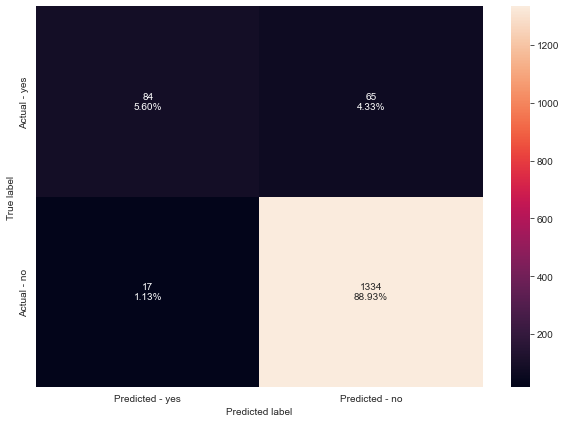

<IPython.core.display.Javascript object>

In [78]:
# The newton-cg solver is faster for high-dimensional data

lr = LogisticRegression(solver="newton-cg", random_state=1, fit_intercept=False)
model = lr.fit(X_train, y_train)

# confusion matrix

make_confusion_matrix(lr, "sklearn", X_test, y_test)

# Let's check model performances for this model
scores_LR = get_metrics_score(model, "sklearn", X_train, X_test, y_train, y_test)

# VIF

In [79]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train.astype(float).copy()


<IPython.core.display.Javascript object>

In [80]:
vif_series1 = pd.Series(
    [
        variance_inflation_factor(X_train_num.values, i)
        for i in range(X_train_num.shape[1])
    ],
    index=X_train_num.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series1))

Series before feature selection: 

const                 437.547164
Age                    91.299838
Experience             91.251124
Income                  1.872525
Family                  1.031957
CCAvg                   1.739091
Education               1.109986
Mortgage                1.046053
Securities_Account      1.144398
CD_Account              1.355737
Online                  1.040826
CreditCard              1.109170
dtype: float64



<IPython.core.display.Javascript object>

We see that Age and Experience have high VIF scores so we drop them in our modeling going forward.

In [81]:
loan.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

# Logistic Regression with Stats Library

In [82]:
# logit = sm.Logit(y_train, X_train.astype(float))
# lg = logit.fit(warn_convergence=False)

# # Let's check model performances for this model
# scores_LR = get_metrics_score(lg, "stats", X_train, X_test, y_train, y_test)

<IPython.core.display.Javascript object>

In [83]:
X_train2 = X_train.drop(["Experience", "Age"], axis=1)
X_test2 = X_test.drop(["Experience", "Age"], axis=1)

logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(warn_convergence=False)

print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.124521
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                  0.6022
Time:                        23:33:26   Log-Likelihood:                -435.82
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                2.122e-278
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.5016      0.701    -19.268      0.000     -14.875     -12.128
Incom

<IPython.core.display.Javascript object>

In [84]:
X_train2_num = X_train2.astype(float).copy()

<IPython.core.display.Javascript object>

In [85]:
vif_series2 = pd.Series(
    [
        variance_inflation_factor(X_train2_num.values, i)
        for i in range(X_train2_num.shape[1])
    ],
    index=X_train2_num.columns,
    dtype=float,
)
print("Series after feature selection: \n\n{}\n".format(vif_series2))

Series after feature selection: 

const                 18.119442
Income                 1.866576
Family                 1.027783
CCAvg                  1.732781
Education              1.047101
Mortgage               1.045987
Securities_Account     1.144033
CD_Account             1.353925
Online                 1.040709
CreditCard             1.109043
dtype: float64



<IPython.core.display.Javascript object>

Accuracy on training set :  0.9528571428571428
Accuracy on test set :  0.9486666666666667
Recall on training set :  0.6435045317220544
Recall on test set :  0.5906040268456376
Precision on training set :  0.8192307692307692
Precision on test set :  0.8461538461538461
F1 on training set :  0.7208121827411168
F1 on test set :  0.6956521739130435


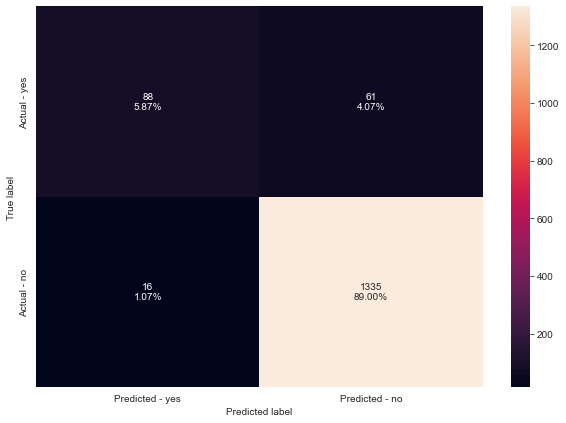

<IPython.core.display.Javascript object>

In [86]:
# Check model performance

# confusion matrix
make_confusion_matrix(lg2, "stats", X_test2, y_test)

# metrics
scores_LR = get_metrics_score(lg2, "stats", X_train2, X_test2, y_train, y_test)

# Section 7

# Area Under the Curve - Receiver Operating Characteristics

AUC-ROC metrics on training set

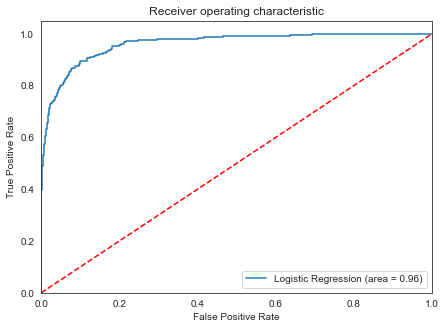

<IPython.core.display.Javascript object>

In [87]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is.
AUC is 0.96 in our model which indicates that it is a good model

# AUC-ROC Metrics on the Test set

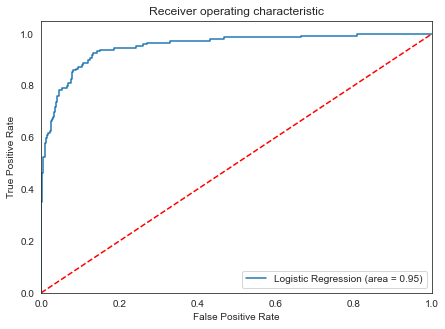

<IPython.core.display.Javascript object>

In [88]:
logit_roc_auc_test = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Model Improvement

# 1) Using ROC-AUC to find optimal threshold

In [89]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg2.predict(X_test2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.05631493371662913


<IPython.core.display.Javascript object>

Accuracy on training set :  0.8514285714285714
Accuracy on test set :  0.8733333333333333
Recall on training set :  0.9214501510574018
Recall on test set :  0.9194630872483222
Precision on training set :  0.38172715894868586
Precision on test set :  0.43492063492063493
F1 on training set :  0.5398230088495575
F1 on test set :  0.5905172413793104
ROC-AUC Score on training set :  0.8827825068950625
ROC-AUC Score on test set :  0.8938544155708673


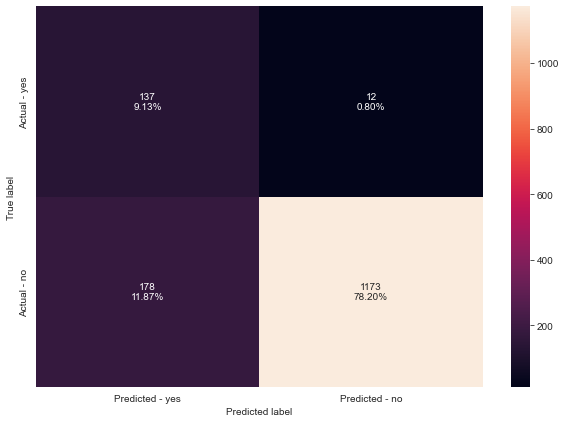

<IPython.core.display.Javascript object>

In [90]:
# confusion matrix
make_confusion_matrix(
    lg2, "stats", X_test2, y_test, threshold=optimal_threshold_auc_roc
)

# checking model performance
scores_LR = get_metrics_score(
    lg2,
    "stats",
    X_train2,
    X_test2,
    y_train,
    y_test,
    threshold=optimal_threshold_auc_roc,
    roc=True,
)

# 2) Threshold from Precision and Recall curve

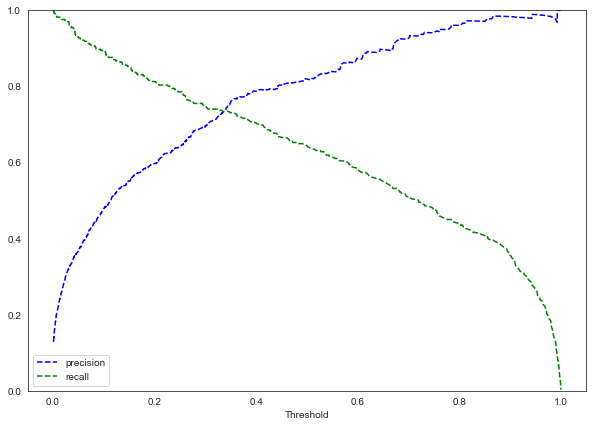

<IPython.core.display.Javascript object>

In [91]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [92]:
tre

array([0.00120418, 0.00120423, 0.00120605, ..., 0.99950737, 0.99964763,
       0.99976754])

<IPython.core.display.Javascript object>

# Section 8

# Decision Tree

Data Preparation

In [93]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


<IPython.core.display.Javascript object>

In [94]:
loan5 = loan.copy()

<IPython.core.display.Javascript object>

In [95]:
X = loan5.drop("Personal_Loan", axis=1)
Y = loan5["Personal_Loan"]

<IPython.core.display.Javascript object>

In [96]:
# Splitting data into training and test set:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 11) (1500, 11)


<IPython.core.display.Javascript object>

In [97]:
cols = list(loan5.columns)
cols.remove(
    "Personal_Loan"
)  # Keep only names of features by removing the name of target variable
feature_names = cols
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


<IPython.core.display.Javascript object>

# Building the Decision Tree

In [98]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

# First Decision Tree Model

In [99]:
dtmodel = DecisionTreeClassifier(
    criterion="gini",random_state=1
)


<IPython.core.display.Javascript object>

In [100]:
dtmodel.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [101]:
def make_confusion_matrix2(model, Y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    Y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(Y_actual, Y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

Checking model performance on test set

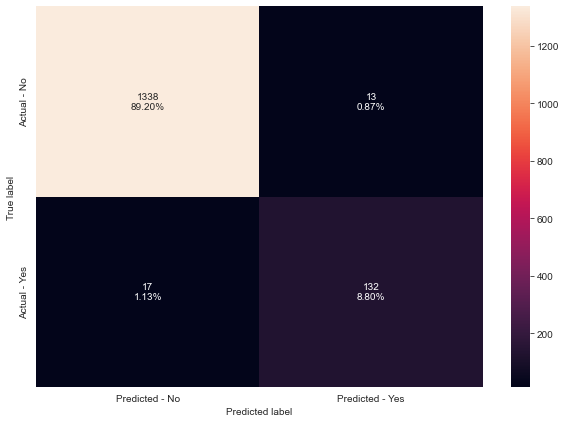

<IPython.core.display.Javascript object>

In [102]:
make_confusion_matrix2(dtmodel, Y_test)

In [103]:
##  Function to calculate recall score
def get_recall_score(dtmodel):
    """
    model : classifier to predict values of X

    """
    pred_train = dtmodel.predict(X_train)
    pred_test = dtmodel.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(Y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(Y_test, pred_test))

<IPython.core.display.Javascript object>

# Checking model performance (First Decision Tree Model)

In [104]:
get_recall_score(dtmodel)

Recall on training set :  1.0
Recall on test set :  0.8859060402684564


<IPython.core.display.Javascript object>

In [105]:
Accuracy

NameError: name 'Accuracy' is not defined

<IPython.core.display.Javascript object>

In [ ]:
dtmodel.fit(X_test, Y_test)
predicted_classes_test = dtmodel.predict(X_test)
accuracy = accuracy_score(Y_test, predicted_classes_test)
print(accuracy)

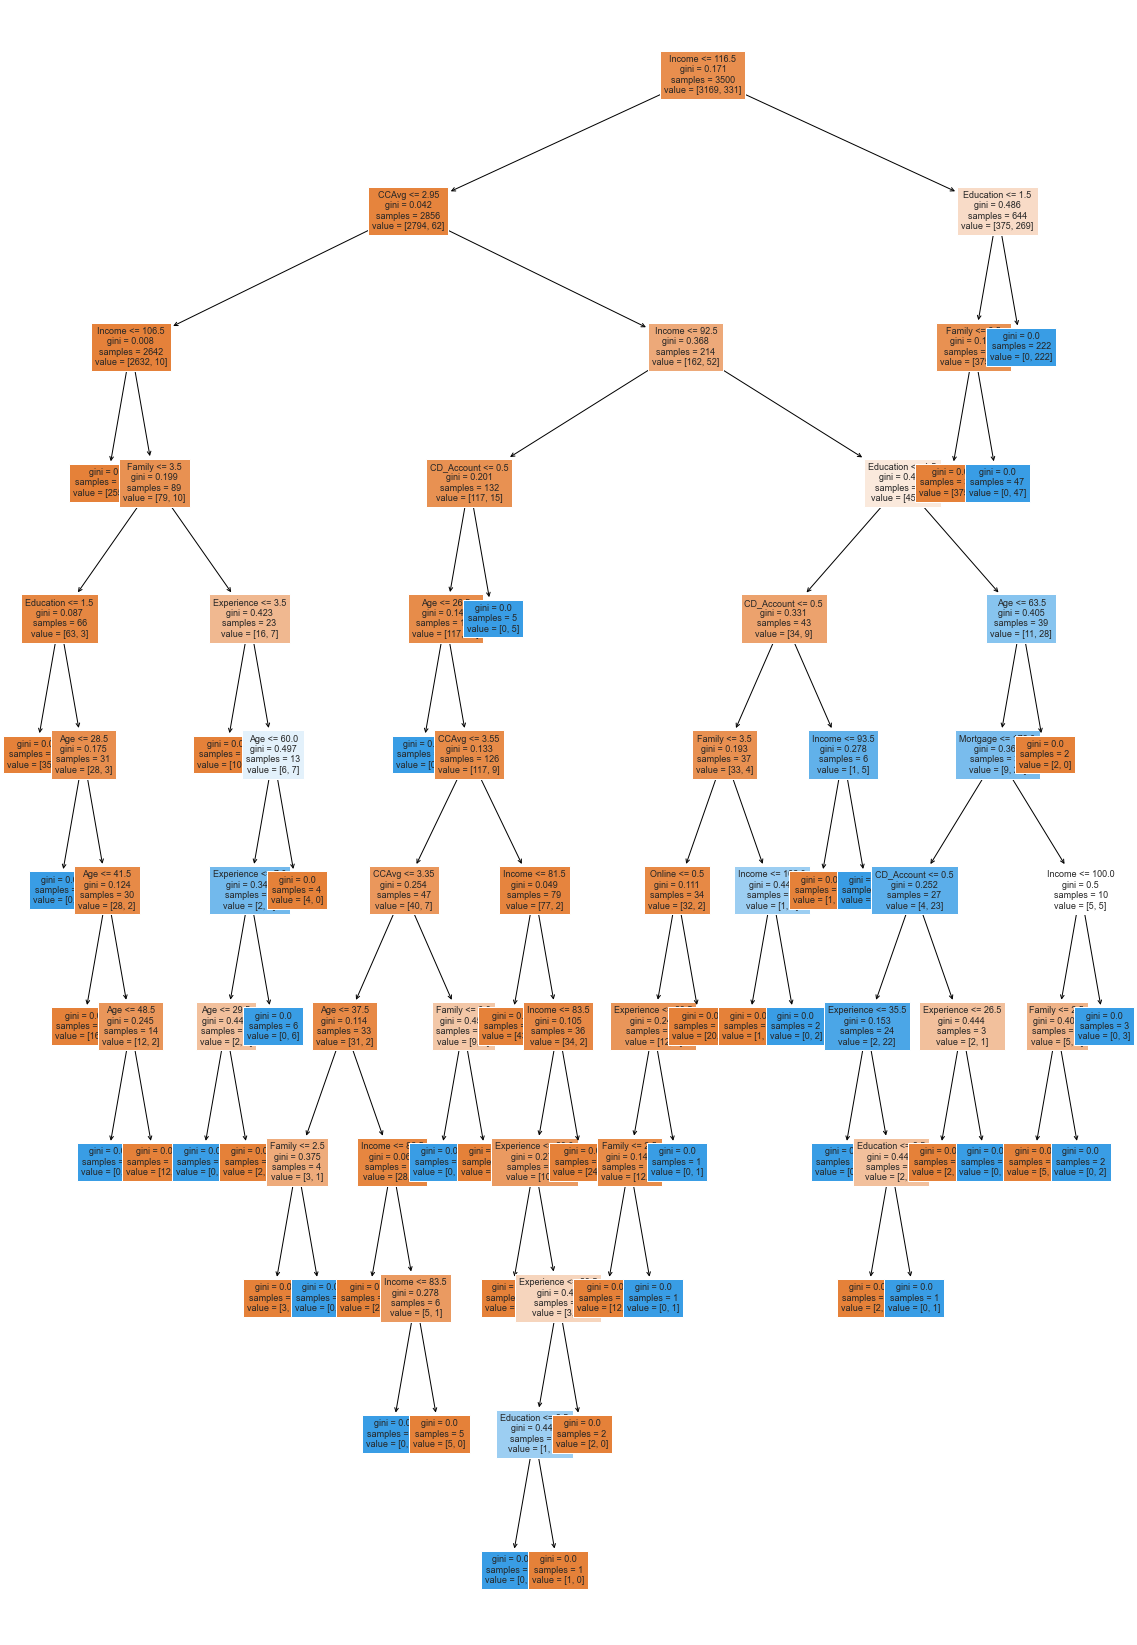

<IPython.core.display.Javascript object>

In [106]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtmodel,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [107]:
# The importance of a feature is computed as the(normalized) total reduction of the criterion brought by that feature.
# It is also known as the Gini importance

print(
    pd.DataFrame(
        dtmodel.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.405914
Income              0.310561
Family              0.167646
CCAvg               0.042183
CD_Account          0.025711
Age                 0.023880
Experience          0.020528
Mortgage            0.003014
Online              0.000561
Securities_Account  0.000000
CreditCard          0.000000


<IPython.core.display.Javascript object>

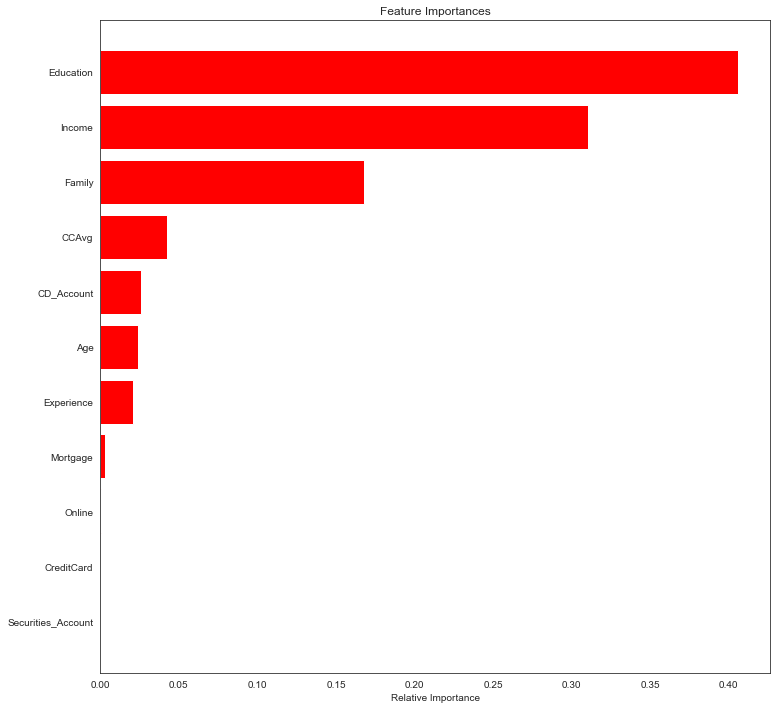

<IPython.core.display.Javascript object>

In [108]:
importances = dtmodel.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The outputs above indicate that Income is the most important variable. Which seems to make sense intuitively. However, to be sure about the results, we will reduce overfitting in the model

# Second Decision Tree Model

# Overfit Reduction with GridSearchCV (Pre-pruning)

In [109]:
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [110]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=9, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

<IPython.core.display.Javascript object>

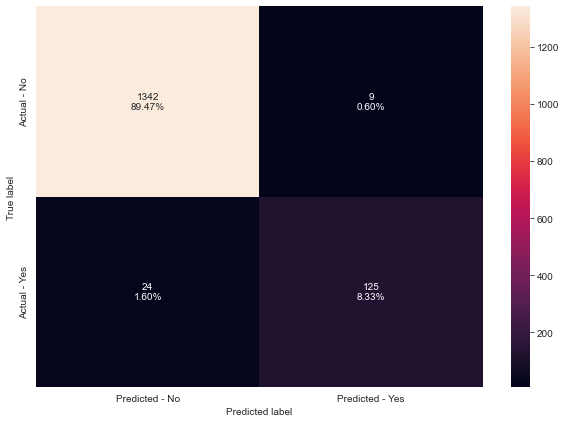

<IPython.core.display.Javascript object>

In [111]:
make_confusion_matrix2(estimator, Y_test)

# Checking model performance (Second Decision Tree Model)

In [112]:
get_recall_score(estimator)

Recall on training set :  0.9697885196374623
Recall on test set :  0.8389261744966443


<IPython.core.display.Javascript object>

Accuracy

In [115]:
estimator.fit(X_test, Y_test)
predicted_classes_test = estimator.predict(X_test)
accuracy = accuracy_score(Y_test, predicted_classes_test)
print(accuracy)

0.9973333333333333


<IPython.core.display.Javascript object>

# Checking the tree after hyperparameter tuning

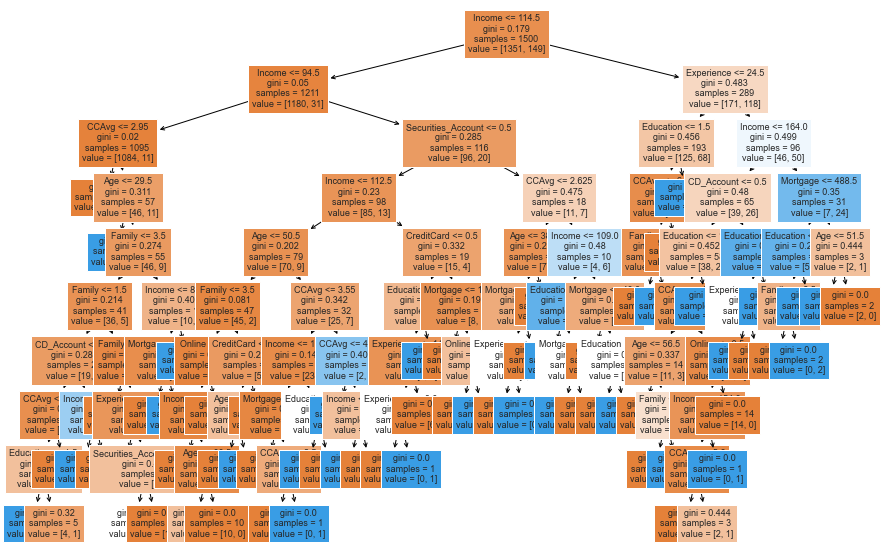

<IPython.core.display.Javascript object>

In [116]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [117]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see how importance of features has changed

                         Imp
Education           0.364112
Income              0.344616
Family              0.108932
CCAvg               0.061032
Age                 0.032672
Experience          0.029535
Mortgage            0.022676
CD_Account          0.018828
Securities_Account  0.008856
Online              0.006191
CreditCard          0.002551


<IPython.core.display.Javascript object>

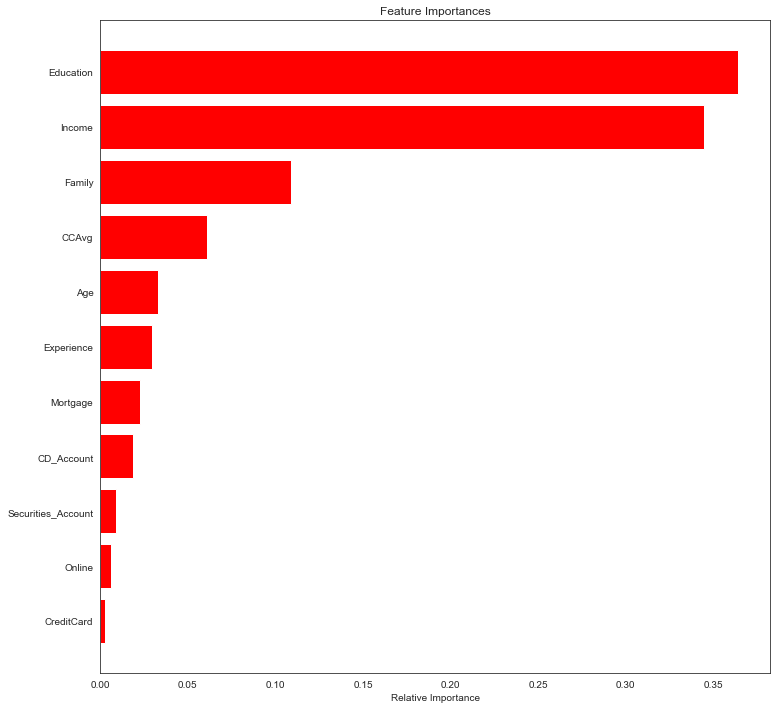

<IPython.core.display.Javascript object>

In [118]:
importances2 = estimator.feature_importances_
indices = np.argsort(importances2)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances2[indices], color="red", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Third Decision Tree Model - Post Pruning

# Cost Complexity Pruning

In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path function that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [119]:
dtp = DecisionTreeClassifier(random_state=1)
path = dtp.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

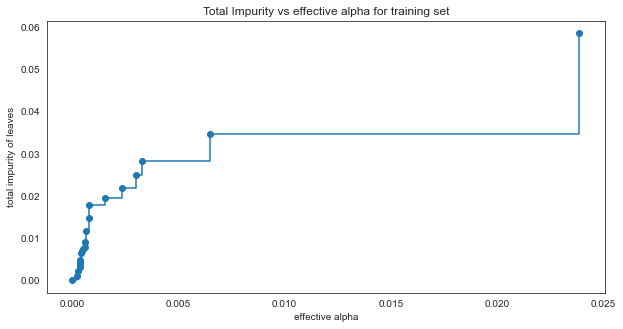

<IPython.core.display.Javascript object>

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [121]:
clfs = []
for ccp_alpha in ccp_alphas:
    dtp = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    dtp.fit(X_train, Y_train)
    clfs.append(dtp)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)  # he last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


<IPython.core.display.Javascript object>

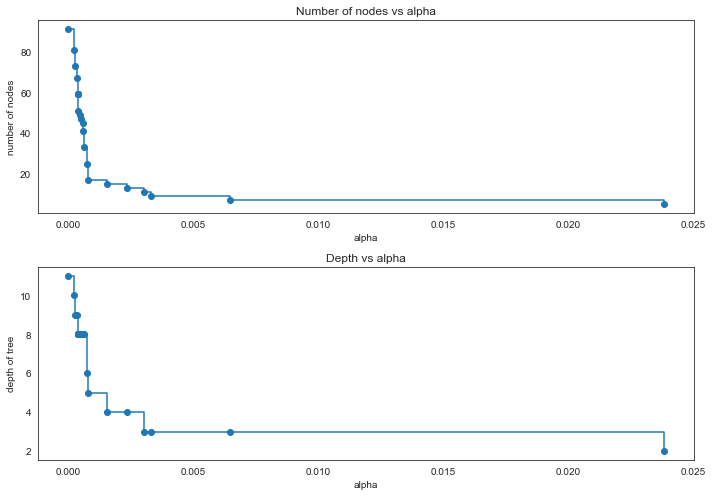

<IPython.core.display.Javascript object>

In [122]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# Recall vs Alpha for training and testing sets

In [123]:
recall_train = []
for dtp in clfs:
    pred_train3 = dtp.predict(X_train)
    values_train = metrics.recall_score(Y_train, pred_train3)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [124]:
recall_test = []
for dtp in clfs:
    pred_test3 = dtp.predict(X_test)
    values_test = metrics.recall_score(Y_test, pred_test3)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [125]:
train_scores = [dtp.score(X_train, Y_train) for dtp in clfs]
test_scores = [dtp.score(X_test, Y_test) for dtp in clfs]

<IPython.core.display.Javascript object>

Next we can visualize the scores against the alphas

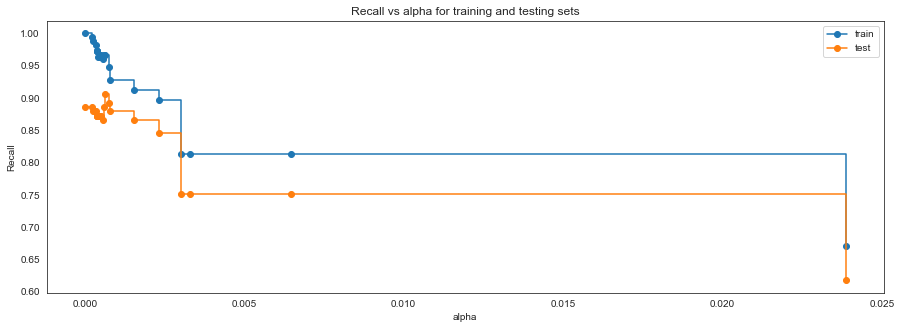

<IPython.core.display.Javascript object>

In [126]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [127]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


<IPython.core.display.Javascript object>

In [128]:
best_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)

<IPython.core.display.Javascript object>

Checking model performance on test set

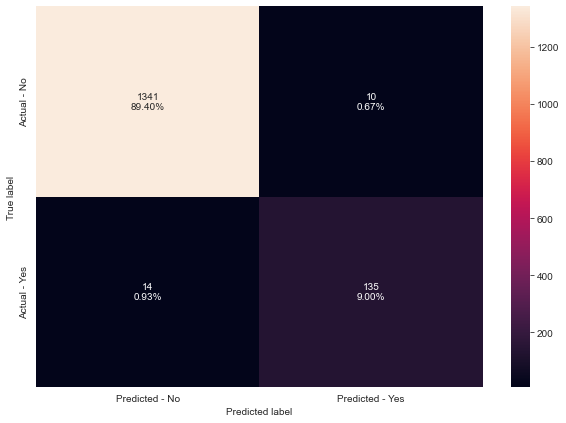

<IPython.core.display.Javascript object>

In [129]:
make_confusion_matrix2(best_model, Y_test)

# Checking model performance (Third Decision Tree Model)

In [130]:
get_recall_score(best_model)

Recall on training set :  0.9667673716012085
Recall on test set :  0.9060402684563759


<IPython.core.display.Javascript object>

# Accuracy

In [131]:
best_model.fit(X_test, Y_test)
predicted_classes_test = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, predicted_classes_test)
print(accuracy)

0.9966666666666667


<IPython.core.display.Javascript object>

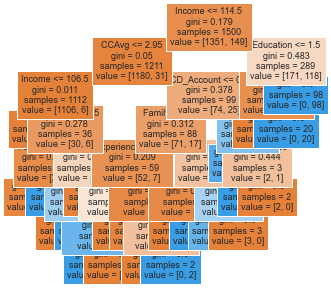

<IPython.core.display.Javascript object>

In [132]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [133]:
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.416194
Income              0.289359
Family              0.157431
CCAvg               0.071050
CD_Account          0.021496
Age                 0.018497
Mortgage            0.013359
Experience          0.012614
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


<IPython.core.display.Javascript object>

Education is the most important variable that determines whether one gets a personal loan, followed by Income

In comparing Logistic Regression Models:
1. Logistic Regression with Sklearn - Accuracy=.94; Recall=.56; F1=.67
2. Logistic Regression with Statsmodel - Accuracy=.94; Recall=.59; F1=.69
3. Logistic Regression using Optimal Threshold - Accuracy=.87; Recall=.91; F1=.59

In comparing Decision Tree Models:

4. First Decision Tree Model - Accuracy=1; Recall=.88
5. Second Decision Tree Model- Accuracy=1; Recall=.83
6. Third Decision Tree Model - Post Pruning - Accuracy=.99; Recall=.90

In using Recall, Decision Tree models performed better and the Third Decision Tree Model - Post Pruning was the best

Recommendations:
Undergraduates seem to have less personal loans compared to Graduates and Advanced/Professionals. They should be investigated further as a group and targeted in marketing campaigns for personal loans.
In using Recall, Decision Tree models performed better and the Third Decision Tree Model - Post Pruning was the best.

It is recommended that AllLife Bank use the Decision Tree Model - Post Pruning on its growing customer base to identify potential buyers for Personal Loans.